In [2]:
# If load_boston does not work then download the data and use this.
# Data : https://github.com/afnan47/sem8/blob/master/DL/1_boston_housing.csv
import pandas as pd
df = pd.read_csv("/content/1_boston_housing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


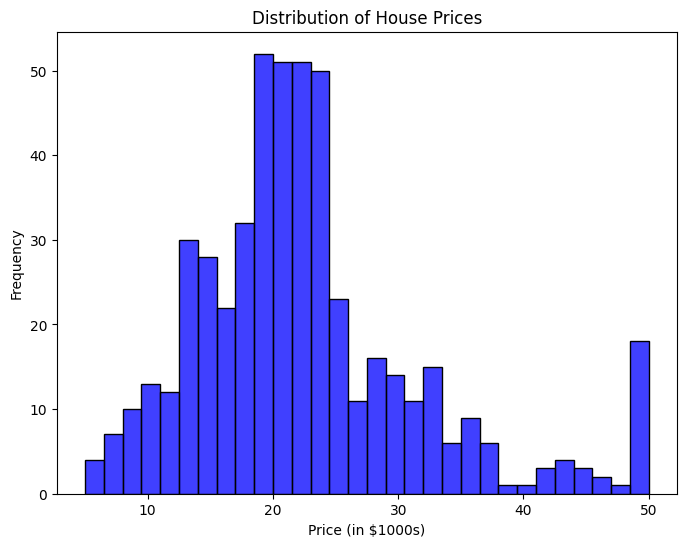

In [3]:
#optional
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of house prices with a simpler approach
plt.figure(figsize=(8, 6))
sns.histplot(df['MEDV'], bins=30, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price (in $1000s)')
plt.ylabel('Frequency')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['MEDV'])
y = df['MEDV']

In [5]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [6]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential([
    Dense(128, input_shape=(13, ), activation='relu', name='dense_1'),
    Dense(64, activation='relu', name='dense_2'),
    Dense(1, activation='linear', name='dense_output')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
HISTORY = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose = 1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 611.3035 - mae: 22.9265 - val_loss: 527.6635 - val_mae: 21.3266
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 571.9688 - mae: 22.0088 - val_loss: 478.6857 - val_mae: 20.1562
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 513.3914 - mae: 20.2957 - val_loss: 403.7505 - val_mae: 18.2118
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 420.9184 - mae: 18.0373 - val_loss: 295.1978 - val_mae: 14.9327
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 314.2205 - mae: 14.8352 - val_loss: 173.3539 - val_mae: 10.3292
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 192.9753 - mae: 11.2261 - val_loss: 93.4492 - val_mae: 7.5458
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 136.2624 - mae: 8.8843 - val_loss: 77.9360 - val_mae: 7.0137
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 146.2832 - mae: 9.4748 - val_loss: 71.4805 - val_mae: 6.4843
Epoch 9/100
11/11 

Text(0, 0.5, 'loss')

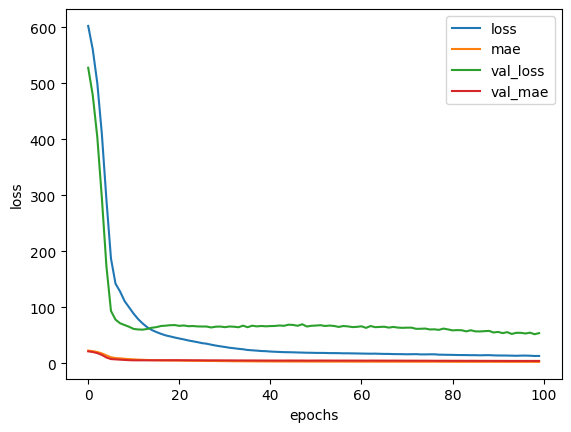

In [14]:
import matplotlib.pyplot as plt
pd.DataFrame(HISTORY.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

In [12]:
pred=model.predict(X_test)
pred

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[26.593605 ],
       [35.26669  ],
       [16.71356  ],
       [24.888288 ],
       [17.00942  ],
       [20.912758 ],
       [17.174025 ],
       [15.885787 ],
       [22.022055 ],
       [18.932745 ],
       [20.077806 ],
       [17.700596 ],
       [ 1.6842097],
       [20.654928 ],
       [18.4761   ],
       [25.123081 ],
       [19.963266 ],
       [ 8.990892 ],
       [44.32002  ],
       [15.827065 ],
       [26.347353 ],
       [27.984451 ],
       [13.474319 ],
       [24.34234  ],
       [16.32736  ],
       [14.448458 ],
       [21.18318  ],
       [12.940256 ],
       [18.69528  ],
       [17.745285 ],
       [18.966982 ],
       [24.69647  ],
       [24.379507 ],
       [19.635859 ],
       [14.171213 ],
       [16.359163 ],
       [33.30572  ],
       [20.620895 ],
       [20.226767 ],
       [24.36825  ],
       [13.533493 ],
       [30.399698 ],
       [46.637955 ],
       [17.322771 ],
       [25.32223  ],
       [15.839136 ],
       [14.760876 ],
       [25.93

In [13]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.5778 - mae: 2.3055
Mean squared error on test data:  15.13403606414795
Mean absolute error on test data:  2.488713264465332
